<img src="https://findlogovector.com/wp-content/uploads/2019/03/vellore-institute-of-technology-vit-logo-vector.png" height = "30%">


<div align="start"><h1>CSE3020<br>DATA VISUALISATION - PROJECT REVIEW</h1></div>

<div align="start"><h2>STOCK ANALYSIS AND PREDICTION USING VISUALISATION</h2></div>

>Vasudha Tapriya, 18BCE0870 and Siddhartha Varma, 18BCE0865



# PART 1: ANALYSIS

In [127]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 6, 1)

df = web.DataReader("IOC.NS", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-27,77.949997,76.000000,77.199997,77.550003,14313444.0,77.550003
2020-05-28,78.800003,77.199997,77.400002,77.699997,9977847.0,77.699997
2020-05-29,84.699997,77.199997,77.699997,83.199997,34568996.0,83.199997
2020-06-01,87.250000,84.500000,85.300003,86.150002,29795723.0,86.150002
2020-06-02,86.849998,84.750000,86.599998,85.800003,17989417.0,85.800003


Here we have used pandas web data reader to read the stock value for last 10 years for the stock of **Indian Oil Corporation Limited**

We read the values and store it in a pandas dataframe. 

we have showed the last 6 recent values using ```df.tail()```

In [0]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

Here we calculate the moving average of last 100 windows.


__What is Moving Average?__

>a moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set.

In layman terms, it is used to smooth out the noise in price data by creating a constantly updated average price

Date
2020-05-27    95.490941
2020-05-28    95.061329
2020-05-29    94.696723
2020-06-01    94.357806
2020-06-02    94.005381
Name: Adj Close, dtype: float64


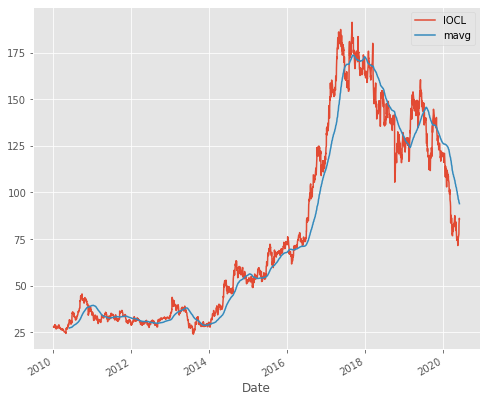

In [129]:
print(mavg.tail())

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='IOCL')
mavg.plot(label='mavg')
plt.legend()

We see the actual stock price chart vs the stock prices from moving avg.  The Moving Average makes the line smooth and showcases the decreasing trend of stocks price.

__Clearly moving average makes the stock price is smoothed out__

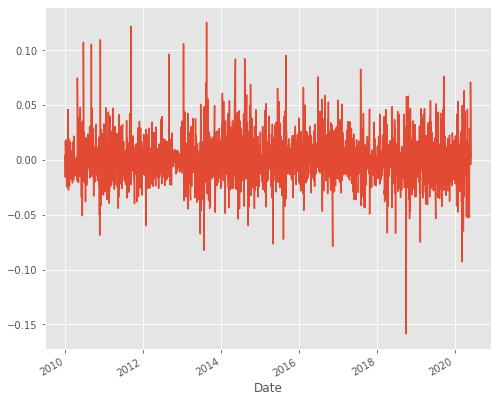

In [130]:
returns = close_px / close_px.shift(1) - 1
returns.plot(label='return')

__So what have plotted here?__

+ This is called expected return. It shows a return deviation to determine risk and return.

+ A standard definition would be
>Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — _Investopedia_.

![alt text](https://miro.medium.com/max/574/1*dx21tSoZSRX_YbDAgvR_JQ.png)

+ our converted formula for this is 
```python 
returns = close_px / close_px.shift(1) - 1
```

+ In layman terms (yet again) we can see the yeaer vs a return graph. Higher the value, safer it is to expect a return.

+ Clearly this shows a negative trend if we see recent data.

In [131]:
dfcomp = web.DataReader(['IOC.NS', 'SUNPHARMA.NS'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.head()

Symbols,IOC.NS,SUNPHARMA.NS
Date,,
2010-01-04,28.011845,130.672775
2010-01-05,28.118677,134.599854
2010-01-06,28.078613,136.346695
2010-01-07,27.637934,134.270447
2010-01-08,28.109768,136.533096


+ Here we are trying to show the relation between two markets - oil and medicine (pharmaceuticles) 
+ We take the Adj close values of both IOC and SUNPHARMA from Yahoo stocks
+ We can analyse the competition by running the percentage change and correlation function in pandas. 
+ Percentage change will find how much the price changes compared to the previous day which defines returns.

Symbols         IOC.NS  SUNPHARMA.NS
Symbols                             
IOC.NS        1.000000      0.126972
SUNPHARMA.NS  0.126972      1.000000


Text(0, 0.5, 'Returns SUNPHARMA')

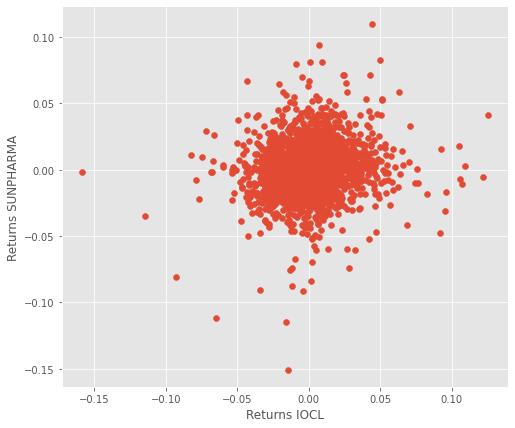

In [132]:
return_comp = dfcomp.pct_change()

corr = return_comp.corr()
print(corr)

plt.scatter(return_comp['IOC.NS'], return_comp['SUNPHARMA.NS'])
plt.xlabel('Returns IOCL')
plt.ylabel('Returns SUNPHARMA')

+ We can see here that there are slight positive correlations among IOC returns and SUNPHARMA returns. +ve Return on IOCL yields a +ve return on SUNPHARMA
+ very slightly positive!

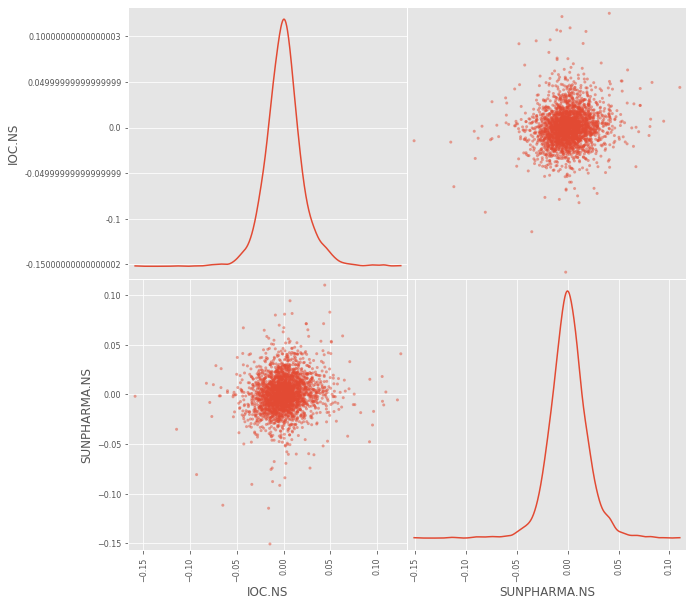

In [133]:
pd.plotting.scatter_matrix(return_comp, diagonal='kde', figsize=(10, 10));

+ Let us further improve our analysis by plotting the scatter_matrix to visualize possible correlations among the given stocks.
+ At the diagonal point, we will run Kernel Density Estimate (KDE).
> KDE is a fundamental data smoothing problem where information about the population is gathered, based on a finite data sample. It helps generate estimations of the overall distributions.

+ From here we can see that the distributions among stocks have approximately positive correlations

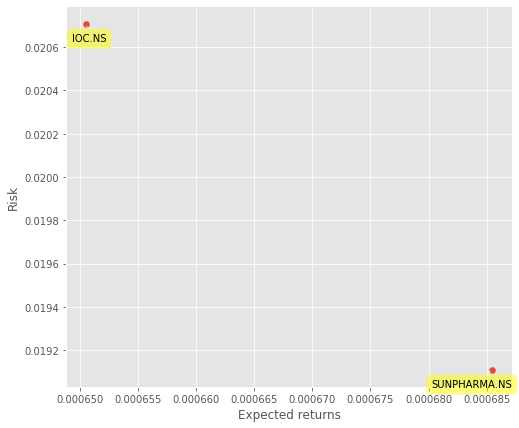

In [134]:
plt.scatter(return_comp.mean(), return_comp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(return_comp.columns, return_comp.mean(), return_comp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

## This is something interesting

+ We know mostly oil is a profitable business but due to the recent pandemic, oil has lost in value
+ We also heard the news of crude oil price going into negative
+ Our chart proves this because
 1. It shows that Buying IOC stock has
 + High Risk
 + Low expected returns

 2. It also shows buying SUNPHARMA stock would be profitable because
  + Low Risk
  + High Expected Returns

# PART 2: PREDICTION

In [0]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
import pandas_datareader.data as web
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2020, 6, 1)


In [0]:
warnings.filterwarnings('ignore')

In [137]:
df = pd.read_csv("./drive/My Drive/IndianOil.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,67.737503,67.737503,66.175003,66.662498,33.416119,916772.0
1,2013-01-02,66.750000,68.125000,66.737503,68.000000,34.086571,1290928.0
2,2013-01-03,68.487503,68.487503,67.324997,67.887497,34.030174,764204.0
3,2013-01-04,68.025002,72.199997,67.887497,70.287498,35.233231,6673680.0
4,2013-01-07,68.062500,72.462502,68.062500,70.312500,35.245762,7254292.0


In [0]:
df=df.fillna(df.mean())

In [139]:
print(df.head())
print(df.shape)
print(df.columns)

         Date       Open       High        Low      Close  Adj Close     Volume
0  2013-01-01  67.737503  67.737503  66.175003  66.662498  33.416119   916772.0
1  2013-01-02  66.750000  68.125000  66.737503  68.000000  34.086571  1290928.0
2  2013-01-03  68.487503  68.487503  67.324997  67.887497  34.030174   764204.0
3  2013-01-04  68.025002  72.199997  67.887497  70.287498  35.233231  6673680.0
4  2013-01-07  68.062500  72.462502  68.062500  70.312500  35.245762  7254292.0
(1823, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


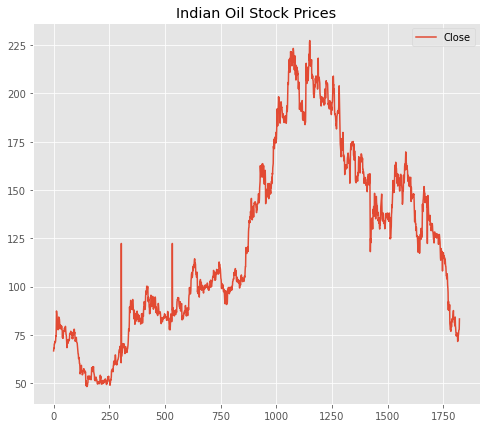

In [140]:
df[['Close']].plot()
plt.title("Indian Oil Stock Prices")
plt.show()

Text(0.5, 1.0, 'Indian Oil Autocorrelation plot')

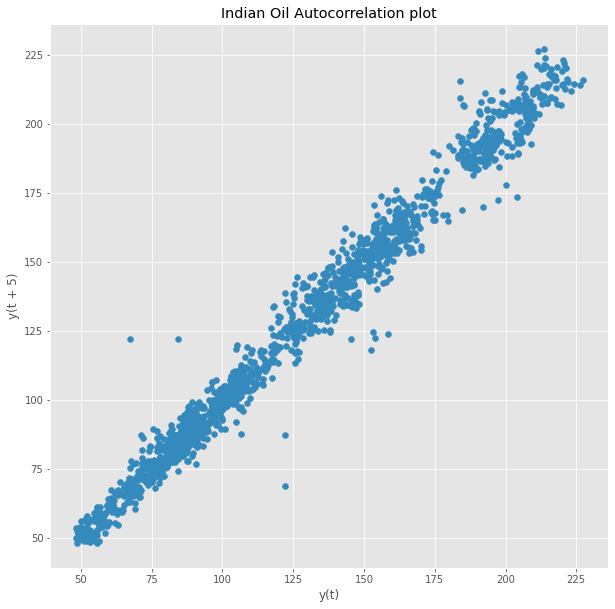

In [141]:
plt.figure(figsize=(10,10))
lag_plot(df['Close'], lag=5) #lag 5 = y(t+5)
plt.title('Indian Oil Autocorrelation plot')

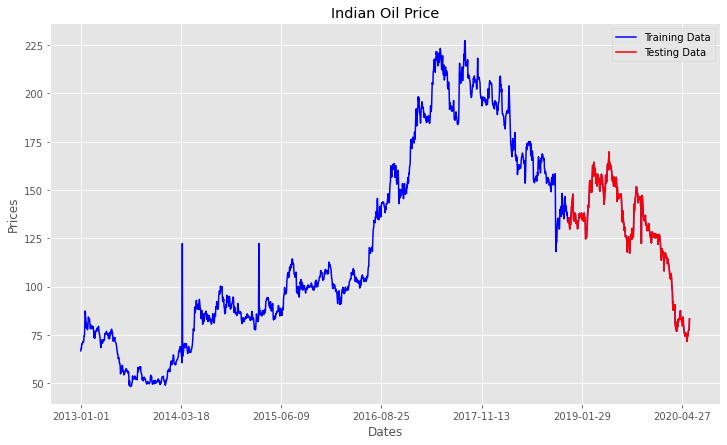

In [142]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Indian Oil Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'red', label='Testing Data')
plt.xticks(np.arange(0,1822, 300), df['Date'][0:1822:300])
plt.legend()

In [0]:
def loss(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))


In [144]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = loss(test_ar, predictions)
print('loss function error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 10.487
loss function error: 21.651


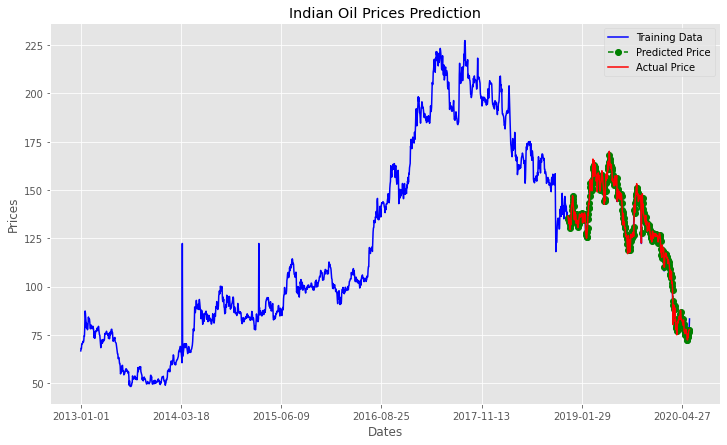

In [145]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Indian Oil Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1821, 300), df['Date'][0:1821:300])
plt.legend()

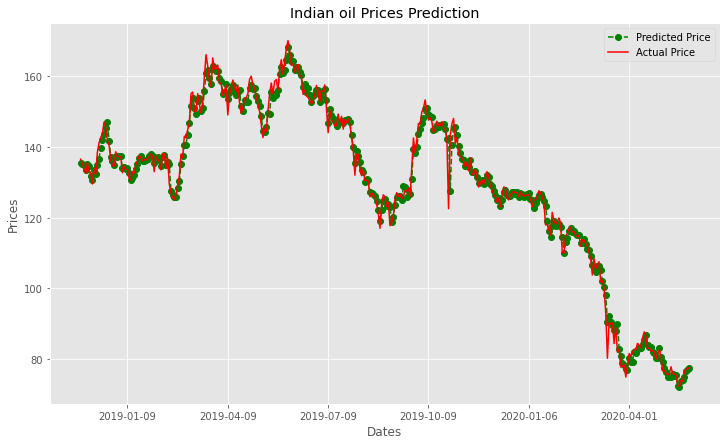

In [146]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1821, 60), df['Date'][1486:1821:60])
plt.title('Indian oil Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [147]:
dfs = pd.read_csv("./drive/My Drive/Sunpharma.csv")
dfs.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,369.549988,374.899994,368.350006,369.750000,357.282318,591988.0
1,2013-01-02,370.049988,373.500000,369.799988,370.450012,357.958710,1043632.0
2,2013-01-03,373.975006,373.975006,365.049988,366.924988,354.552582,1040878.0
3,2013-01-04,368.750000,368.750000,363.225006,367.575012,355.180634,1031736.0
4,2013-01-07,370.399994,374.424988,368.549988,372.075012,359.528931,1968642.0


In [0]:
dfs=dfs.fillna(dfs.mean())

In [149]:
print(dfs.head())
print(dfs.shape)
print(dfs.columns)

         Date        Open        High  ...       Close   Adj Close     Volume
0  2013-01-01  369.549988  374.899994  ...  369.750000  357.282318   591988.0
1  2013-01-02  370.049988  373.500000  ...  370.450012  357.958710  1043632.0
2  2013-01-03  373.975006  373.975006  ...  366.924988  354.552582  1040878.0
3  2013-01-04  368.750000  368.750000  ...  367.575012  355.180634  1031736.0
4  2013-01-07  370.399994  374.424988  ...  372.075012  359.528931  1968642.0

[5 rows x 7 columns]
(1828, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


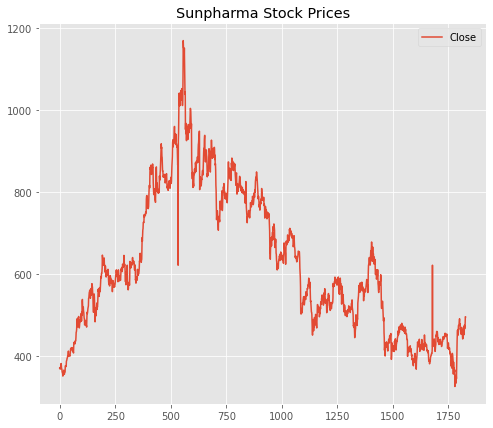

In [150]:
dfs[['Close']].plot()
plt.title("Sunpharma Stock Prices")
plt.show()

Text(0.5, 1.0, 'sun pharma Autocorrelation plot')

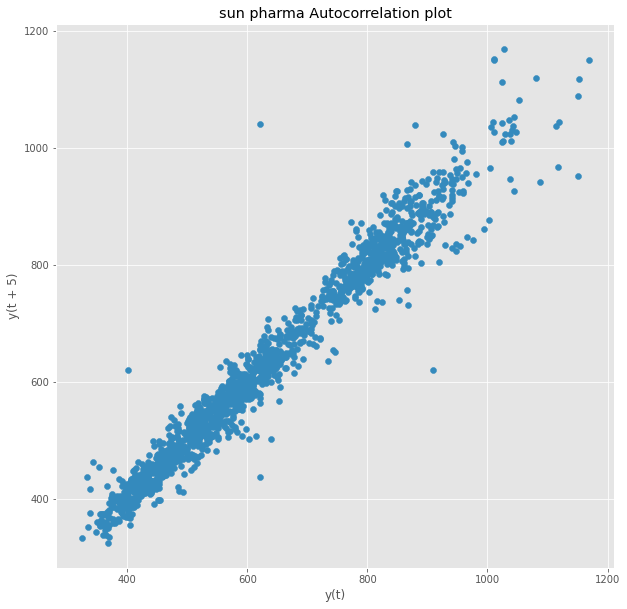

In [151]:
plt.figure(figsize=(10,10))
lag_plot(dfs['Close'], lag=5) #lag 5 = y(t+5)
plt.title('sun pharma Autocorrelation plot')

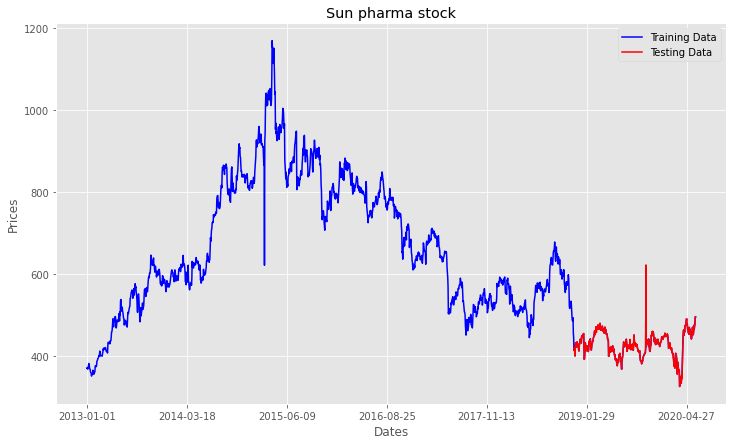

In [152]:
train_data, test_data = dfs[0:int(len(dfs)*0.8)], dfs[int(len(dfs)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Sun pharma stock')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(dfs['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'red', label='Testing Data')
plt.xticks(np.arange(0,1827, 300), dfs['Date'][0:1827:300])
plt.legend()

In [153]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = loss(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 298.575
Symmetric mean absolute percentage error: 7.924


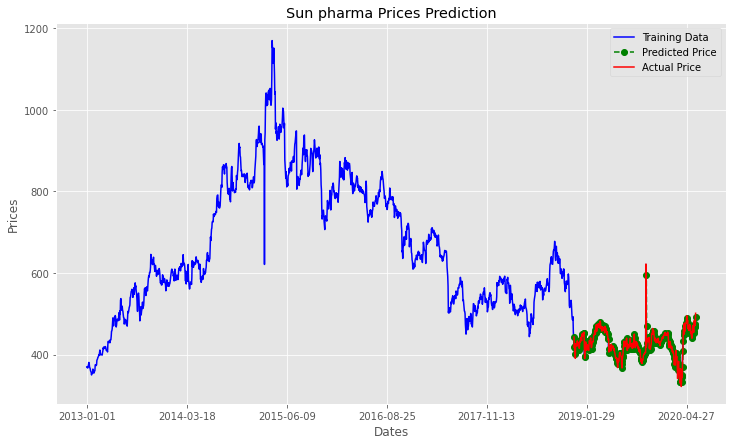

In [154]:
plt.figure(figsize=(12,7))
plt.plot(dfs['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Sun pharma Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1827, 300), dfs['Date'][0:1827:300])
plt.legend()

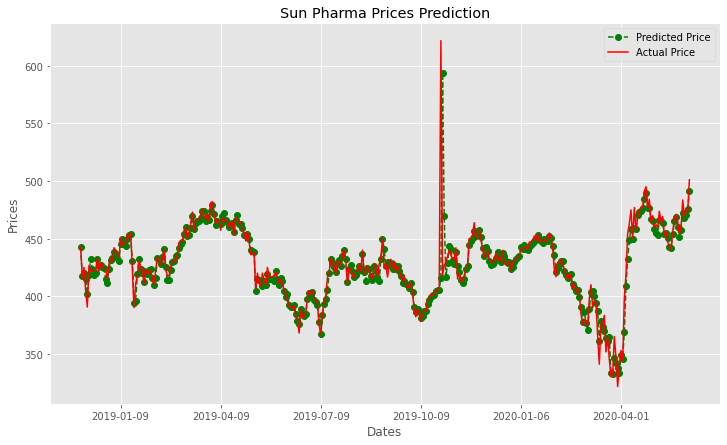

In [155]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1827, 60), dfs['Date'][1486:1828:60])
plt.title('Sun Pharma Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

## EXTRA:

[Tableau workbook which shows rising covid cases compared to the stocks in India](https://public.tableau.com/profile/siddhartha3647#!/vizhome/Book3_15912701787910/Sheet1)